In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam

import matplotlib.pyplot as plt

In [2]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Increased rotation range
    width_shift_range=0.3,  # Increased width shift range
    height_shift_range=0.3,  # Increased height shift range
    shear_range=0.3,  # Increased shear range
    zoom_range=0.3,  # Increased zoom range
    brightness_range=[0.5, 1.5],  # Added brightness adjustment
    horizontal_flip=True,
    fill_mode='constant'  # Experiment with different fill modes
)

In [3]:
image_width = 128
image_height = 128
batch_size = 200
num_epochs = 10

In [4]:
train_generator = datagen.flow_from_directory(
    'dataset',
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 10576 images belonging to 2 classes.


In [5]:
test_generator = datagen.flow_from_directory(
    'tests',
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 80 images belonging to 2 classes.


In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

In [7]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['accuracy'])

In [8]:
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=test_generator
)

Epoch 1/10
53/53 [==============================] - 47s 871ms/step - loss: 0.2911 - accuracy: 0.4999 - val_loss: 0.2582 - val_accuracy: 0.5750
Epoch 2/10
53/53 [==============================] - 50s 934ms/step - loss: 0.2564 - accuracy: 0.5491 - val_loss: 0.2447 - val_accuracy: 0.5875
Epoch 3/10
53/53 [==============================] - 49s 908ms/step - loss: 0.2375 - accuracy: 0.5961 - val_loss: 0.2387 - val_accuracy: 0.6125
Epoch 4/10
53/53 [==============================] - 50s 940ms/step - loss: 0.2310 - accuracy: 0.6163 - val_loss: 0.2228 - val_accuracy: 0.6250
Epoch 5/10
53/53 [==============================] - 50s 927ms/step - loss: 0.2261 - accuracy: 0.6365 - val_loss: 0.2177 - val_accuracy: 0.6750
Epoch 6/10
53/53 [==============================] - 50s 927ms/step - loss: 0.2224 - accuracy: 0.6478 - val_loss: 0.2181 - val_accuracy: 0.6500
Epoch 7/10
53/53 [==============================] - 50s 935ms/step - loss: 0.2212 - accuracy: 0.6469 - val_loss: 0.2120 - val_accuracy: 0.6875

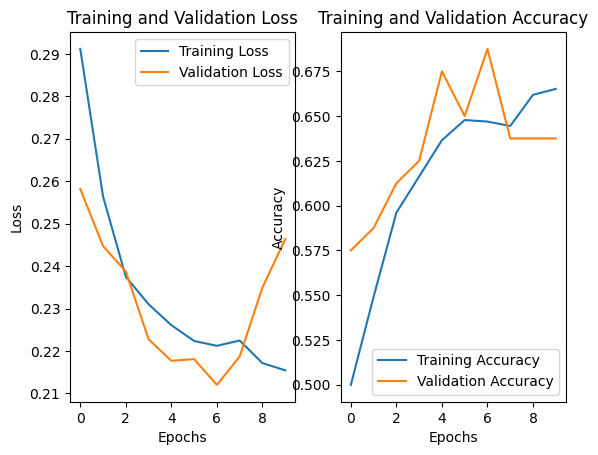

In [9]:
# Plot training and validation loss

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Include 'accuracy'
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Include 'accuracy'
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [10]:
loss = model.evaluate(test_generator)

model.save('quota_model.keras')

1/1 [==============================] - 0s 260ms/step - loss: 0.2511 - accuracy: 0.6500


In [16]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

In [17]:
model = tf.keras.models.load_model('quota_model.keras')

In [18]:
def preprocess_image(img_path):
    try:
        img = Image.open(img_path).convert("RGB")
    except (IOError, OSError, UnidentifiedImageError):
        print(f"Skipping {img_path} as it's not a valid image file.")
        return None
    
    img = img.resize((image_width, image_height))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


# Function to predict gender
def predict_gender(img_path):
    processed_image = preprocess_image(img_path)
    prediction = model.predict(processed_image)
    if prediction[0][0] > 0.5:
        return "Woman"
    else:
        return "Man"

In [19]:
import os

In [20]:
for img in os.listdir("target"):
    print("{}: {}".format(img, predict_gender(f"target/{img}")))

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x16a1b2ca0>